In [494]:
#libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



In [495]:
#import file
df=pd.read_csv('Employee.csv')

In [496]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [497]:
# Or rename the existing DataFrame (rather than creating a copy)
df.rename(columns={'JoiningYear': 'Joining Year', 'PaymentTier':'Payment Tier', 'EverBenched':'Ever Benched', 'LeaveOrNot':'Leave or Not', 'ExperienceInCurrentDomain':'Experience In Current Domain'}, inplace=True)

In [498]:
df.head(4)

,Education,Joining Year,City,Payment Tier,Age,Gender,Ever Benched,Experience In Current Domain,Leave or Not
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1


In [499]:
df.shape

(4653, 9)

In [500]:
df['Joining Year'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: Joining Year, dtype: int64

In [501]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [391]:
df['Payment Tier'].value_counts()

3    3492
2     918
1     243
Name: Payment Tier, dtype: int64

In [392]:
#1-Rolling Tiers
#2-Weekly Tier
#3-Flat Tier

In [393]:
df=df.replace(to_replace="Male",value="1")
df=df.replace(to_replace="Female",value="2")
df=df.replace(to_replace="Bachelors",value="1")
df=df.replace(to_replace="Masters",value="2")
df=df.replace(to_replace="PHD",value="3")
df=df.replace(to_replace="Bangalore",value="1")
df=df.replace(to_replace="Pune",value="2")
df=df.replace(to_replace="New Delhi",value="3")
df=df.replace(to_replace="No",value="0")
df=df.replace(to_replace="Yes",value="1")


In [394]:
df.head(3)

,Education,Joining Year,City,Payment Tier,Age,Gender,Ever Benched,Experience In Current Domain,Leave or Not
0,1,2017,1,3,34,1,0,0,0
1,1,2013,2,1,28,2,0,3,1
2,1,2014,3,3,38,2,0,2,0


In [395]:
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Education                     4653 non-null   object
 1   Joining Year                  4653 non-null   int64 
 2   City                          4653 non-null   object
 3   Payment Tier                  4653 non-null   int64 
 4   Age                           4653 non-null   int64 
 5   Gender                        4653 non-null   object
 6   Ever Benched                  4653 non-null   object
 7   Experience In Current Domain  4653 non-null   int64 
 8   Leave or Not                  4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Education                       False
Joining Year                    False
City                            False
Payment Tier                    False
Age                             False
Gender                          False
Ever Benched                    False
Experience In Current Domain    False
Leave or Not                    False
dtype: bool

In [396]:
df["Education"] = pd.to_numeric(df["Education"])
df["City"] = pd.to_numeric(df["City"])
df["Gender"] = pd.to_numeric(df["Gender"])
df["Ever Benched"] = pd.to_numeric(df["Ever Benched"])

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Education                     4653 non-null   int64
 1   Joining Year                  4653 non-null   int64
 2   City                          4653 non-null   int64
 3   Payment Tier                  4653 non-null   int64
 4   Age                           4653 non-null   int64
 5   Gender                        4653 non-null   int64
 6   Ever Benched                  4653 non-null   int64
 7   Experience In Current Domain  4653 non-null   int64
 8   Leave or Not                  4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


In [398]:
lon=df.set_index('Leave or Not')

In [399]:
leave=df.loc[[0],['Education', 'Joining Year', 'City', 'Payment Tier', 'Age', 'Gender', 'Ever Benched', 'Experience In Current Domain']]

In [400]:
freq_e = leave['Education'].mode()
freq_jy = leave['Joining Year'].mode()
freq_c = leave['City'].mode()
freq_pt = leave['Payment Tier'].mode()
freq_a = leave['Age'].mode()
freq_g = leave['Gender'].mode()
freq_eb = leave['Ever Benched'].mode()
freq_excd = leave['Experience In Current Domain'].mode()
print('Education:',freq_e,'Joning Year:',freq_jy,'City:',freq_c,'Payement Tier:',freq_pt,'Age:',freq_a,"Gender:",freq_g,'Ever Benhed:',freq_eb,"Experience in current domain:",freq_excd)

Education: 0    1
dtype: int64 Joning Year: 0    2017
dtype: int64 City: 0    1
dtype: int64 Payement Tier: 0    3
dtype: int64 Age: 0    34
dtype: int64 Gender: 0    1
dtype: int64 Ever Benhed: 0    0
dtype: int64 Experience in current domain: 0    0
dtype: int64


In [401]:
 stay=df.loc[[1],['Education', 'Joining Year', 'City', 'Payment Tier', 'Age', 'Gender', 'Ever Benched', 'Experience In Current Domain']]

In [402]:
freq_e = stay['Education'].mode()
freq_jy = stay['Joining Year'].mode()
freq_c = stay['City'].mode()
freq_pt = stay['Payment Tier'].mode()
freq_a = stay['Age'].mode()
freq_g = stay['Gender'].mode()
freq_eb = stay['Ever Benched'].mode()
freq_excd = stay['Experience In Current Domain'].mode()
print('Education:',freq_e,'Joning Year:',freq_jy,'City:',freq_c,'Payement Tier:',freq_pt,'Age:',freq_a,"Gender:",freq_g,'Ever Benhed:',freq_eb,"Experience in current domain:",freq_excd)

Education: 0    1
dtype: int64 Joning Year: 0    2013
dtype: int64 City: 0    2
dtype: int64 Payement Tier: 0    1
dtype: int64 Age: 0    28
dtype: int64 Gender: 0    2
dtype: int64 Ever Benhed: 0    0
dtype: int64 Experience in current domain: 0    3
dtype: int64


In [403]:
X = df[['Education','Joining Year','City','Payment Tier','Age','Gender','Ever Benched','Experience In Current Domain']].values

In [404]:
y = df[['Leave or Not']].values

In [405]:
#adjust accuracy

In [406]:
#79%

In [407]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [408]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (3257, 8) &  Size of Y training set (3257, 1)


In [409]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (1396, 8) &  Size of Y testing set (1396, 1)


In [410]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [411]:
tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [412]:
predTree = tree.predict(X_testset)

In [413]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7972779369627507


In [414]:
#82%

In [415]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)

In [416]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (3722, 8) &  Size of Y training set (3722, 1)


In [417]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (931, 8) &  Size of Y testing set (931, 1)


In [418]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)

In [419]:
tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [420]:
predTree = tree.predict(X_testset)

In [421]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8700322234156821


In [422]:
df.head(1)

,Education,Joining Year,City,Payment Tier,Age,Gender,Ever Benched,Experience In Current Domain,Leave or Not
0,1,2017,1,3,34,1,0,0,0


In [423]:
predict=(tree.predict([[3,2011,2,3,50,2,0,1]]))
predict

array([0])

In [424]:
predict2=(tree.predict([[2,2010,1,1,22,2,0,1]]))
predict2

array([0])

In [425]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)
X_trainset.shape, X_testset.shape, y_trainset.shape, y_testset.shape

((3722, 8), (931, 8), (3722, 1), (931, 1))

In [426]:
xgb.XGBClassifier().get_params()


{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [427]:
model_xgb = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_testset, y_testset)]

model_xgb.fit(X_trainset,
                  y_trainset,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.68719
[1]	validation_0-auc:0.71980
[2]	validation_0-auc:0.83000
[3]	validation_0-auc:0.85241
[4]	validation_0-auc:0.85268
[5]	validation_0-auc:0.85142
[6]	validation_0-auc:0.85560
[7]	validation_0-auc:0.86723
[8]	validation_0-auc:0.86638
[9]	validation_0-auc:0.87677
[10]	validation_0-auc:0.88088
[11]	validation_0-auc:0.87986
[12]	validation_0-auc:0.87917
[13]	validation_0-auc:0.87797
[14]	validation_0-auc:0.87596
[15]	validation_0-auc:0.87610


/Users/anna/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.87538
[17]	validation_0-auc:0.87478
[18]	validation_0-auc:0.87440
[19]	validation_0-auc:0.87453
[20]	validation_0-auc:0.87480


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [428]:
model_xgb.fit(X_trainset,y_trainset)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [437]:
y_train_pred = model_xgb.predict_proba(X_trainset)[:,1]
y_test_pred = model_xgb.predict_proba(X_testset)[:,1]

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_trainset, y_train_pred),
                                                    roc_auc_score(y_testset, y_test_pred)))

AUC Train: 0.9711
AUC Test: 0.8647


In [440]:
learning_rate_list = [0.09, 0.05, 0.1, 0.3]
min_samples_leaf=[1,44,10]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "min_samples_leaf": min_samples_leaf,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

108


{'learning_rate': [0.09, 0.05, 0.1, 0.3],
 'min_samples_leaf': [1, 44, 10],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [443]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgb_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgb_hp.fit(X, y)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[14:12:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/2] END learning_rate=0.09, max_depth=2, min_samples_leaf=1, n_estimators=1000;, score=(train=0.892, test=0.864) total time=   0.7s
[14:12:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some param

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [444]:
df_cv_results = pd.DataFrame(model_xgb_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
37,1,0.849540,0.909027,0.05,3,2000
40,1,0.849540,0.909027,0.05,3,2000
43,1,0.849540,0.909027,0.05,3,2000
44,4,0.849049,0.913162,0.05,3,3000
41,4,0.849049,0.913162,0.05,3,3000
...,...,...,...,...,...,...
106,103,0.831689,0.930351,0.3,5,2000
100,103,0.831689,0.930351,0.3,5,2000
104,106,0.828527,0.932291,0.3,5,3000
101,106,0.828527,0.932291,0.3,5,3000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

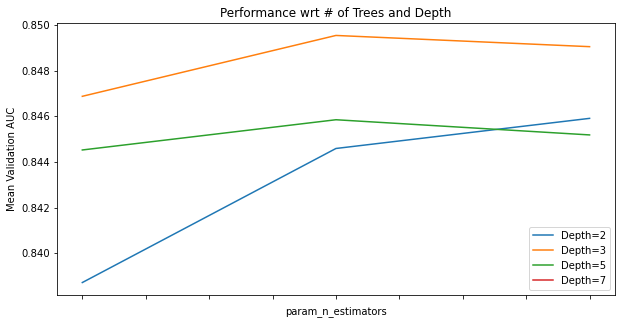

In [445]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

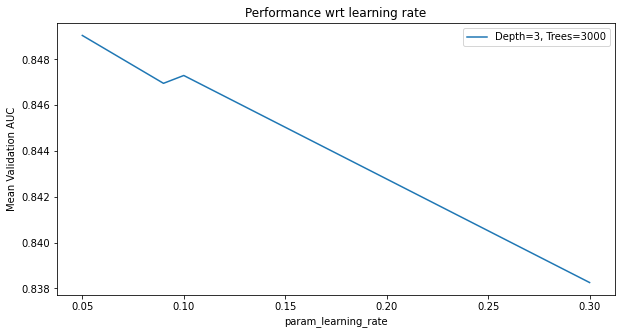

In [446]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==3),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=3, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [448]:
model_xgb_fin = xgb.XGBClassifier(learning_rate=0.05,
                                          max_depth=3,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_trainset, y_trainset),(X_testset, y_testset)]

model_xgb_fin.fit(X_trainset,
                  y_trainset,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.54505	validation_1-auc:0.55558
[1]	validation_0-auc:0.62192	validation_1-auc:0.64673
[2]	validation_0-auc:0.62832	validation_1-auc:0.65179
[3]	validation_0-auc:0.67465	validation_1-auc:0.66542
[4]	validation_0-auc:0.75501	validation_1-auc:0.75802
[5]	validation_0-auc:0.76032	validation_1-auc:0.76853
[6]	validation_0-auc:0.80951	validation_1-auc:0.82933
[7]	validation_0-auc:0.80822	validation_1-auc:0.83232
[8]	validation_0-auc:0.82638	validation_1-auc:0.84572
[9]	validation_0-auc:0.82975	validation_1-auc:0.84531
[10]	validation_0-auc:0.82943	validation_1-auc:0.84863
[11]	validation_0-auc:0.82911	validation_1-auc:0.84767
[12]	validation_0-auc:0.82936	validation_1-auc:0.84538
[13]	validation_0-auc:0.82235	validation_1-auc:0.83993
[14]	validation_0-auc:0.81690	validation_1-auc:0.83290
[15]	validation_0-auc:0.81780	validation_1-auc:0.83824
[16]	validation_0-auc:0.81966	validation_1-auc:0.84386
[17]	validation_0-auc:0.82365	validation_1-auc:0.84629
[18]	validation_0-au

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.82357	validation_1-auc:0.84570
[22]	validation_0-auc:0.82303	validation_1-auc:0.84542
[23]	validation_0-auc:0.82336	validation_1-auc:0.84668
[24]	validation_0-auc:0.82014	validation_1-auc:0.84365
[25]	validation_0-auc:0.82029	validation_1-auc:0.84521
[26]	validation_0-auc:0.82070	validation_1-auc:0.84481
[27]	validation_0-auc:0.82019	validation_1-auc:0.84508
[28]	validation_0-auc:0.82306	validation_1-auc:0.84820
[29]	validation_0-auc:0.82088	validation_1-auc:0.84643
[30]	validation_0-auc:0.81817	validation_1-auc:0.84446
[31]	validation_0-auc:0.82160	validation_1-auc:0.84963
[32]	validation_0-auc:0.82406	validation_1-auc:0.85162
[33]	validation_0-auc:0.82588	validation_1-auc:0.85220
[34]	validation_0-auc:0.82526	validation_1-auc:0.85220
[35]	validation_0-auc:0.82604	validation_1-auc:0.85335
[36]	validation_0-auc:0.82654	validation_1-auc:0.85309
[37]	validation_0-auc:0.82634	validation_1-auc:0.85356
[38]	validation_0-auc:0.82636	validation_1-auc:0.85384
[39]	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.25,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [453]:
y_trainset_pred = model_xgb_fin.predict_proba(X_trainset)[:,1]
y_testset_pred = model_xgb_fin.predict_proba(X_testset)[:,1]

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_trainset, y_trainset_pred),
                                                    roc_auc_score(y_testset, y_testset_pred)))

AUC Train: 0.8564
AUC Test: 0.8724


In [482]:
df_testt = xgb.DMatrix(X, y, enable_categorical=True)

In [515]:
df_testt=pd.read_csv('gdb.csv')

In [514]:
predictions2 = model_xgb.predict(df_testt)
predictions2

array([0, 0, 0])

In [533]:
xgb.plot_tree(model_xgb, num_trees=50, ax=ax)
plt.show()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [528]:
import os
cwd=os.getcwd()
cwd

'/Users/anna'

In [532]:
from graphviz import PosixPath

ImportError: cannot import name 'PosixPath' from 'graphviz' (/Users/anna/opt/anaconda3/lib/python3.9/site-packages/graphviz/__init__.py)